

# 911 Calls Data Analysis Capstone Project

© Darey.io

For this data analysis project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Analytics skills!

### Section 1: Data and Setup

____
**Import numpy and pandas**

In [101]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**Read in the csv file as a dataframe called df**

In [103]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [105]:
# Check for missing values

print(df.isnull().sum())

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64


**Check the head of df**

In [106]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Section 2: Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [107]:
top_five_zipcodes = df[df['zip'].notna()]['zip'].value_counts().head(5)
print("Top 5 Zipcodes for 911 Calls:")
top_five_zipcodes

Top 5 Zipcodes for 911 Calls:


zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [108]:
# Check for nulls (optional)
# Exclude missing townships if any
df = df[df['twp'].notna()]

top_five_townships = df['twp'].value_counts().head(5)

# Displaying the result
print("Top 5 Townships for 911 Calls:")
top_five_townships

Top 5 Townships for 911 Calls:


twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [109]:
# Checking for unique values in the 'title' column
unique_titles = df['title'].nunique()

print(f"There are {unique_titles} unique title codes in the dataset.")


There are 110 unique title codes in the dataset.


### Section 3: Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.**

In [110]:
# Creating a new column 'Reason' by extracting the part before the colon
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

# Displaying the first ten rows to verify
print(df[['title', 'Reason']].head(10))

                         title   Reason
0       EMS: BACK PAINS/INJURY      EMS
1      EMS: DIABETIC EMERGENCY      EMS
2          Fire: GAS-ODOR/LEAK     Fire
3       EMS: CARDIAC EMERGENCY      EMS
4               EMS: DIZZINESS      EMS
5             EMS: HEAD INJURY      EMS
6         EMS: NAUSEA/VOMITING      EMS
7   EMS: RESPIRATORY EMERGENCY      EMS
8        EMS: SYNCOPAL EPISODE      EMS
9  Traffic: VEHICLE ACCIDENT -  Traffic


**What is the most common Reason for a 911 call based off of this new column?**

In [111]:
# Counting how many times each Reason appears
common_reason = df['Reason'].value_counts()

# Displaying the most common Reason
print("Most common Reason for a 911 call:")
common_reason.head(1)


Most common Reason for a 911 call:


Reason
EMS    48853
Name: count, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

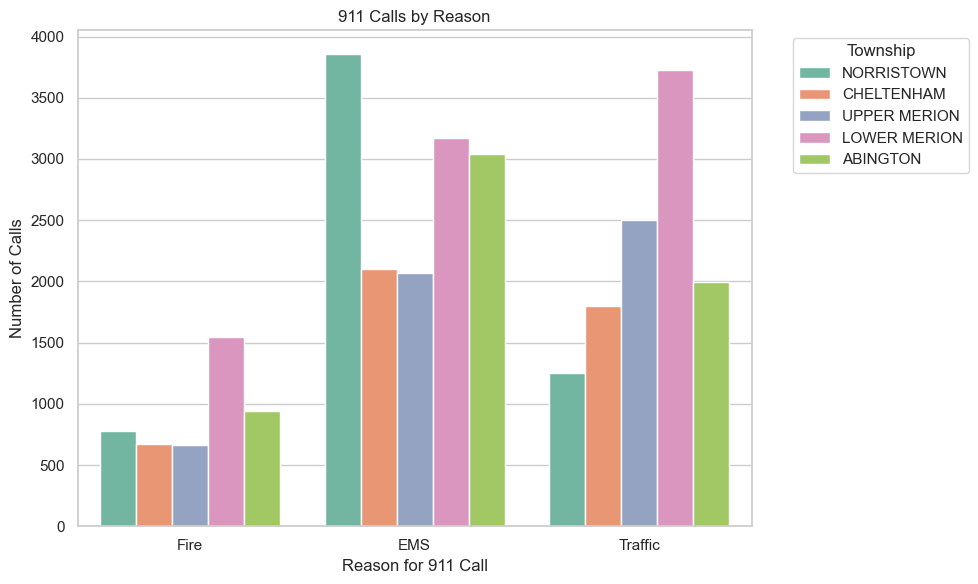

In [112]:
# Filter to include only the top 5 townships (by 911 call volume)
top_twps = df['twp'].value_counts().head(5).index
filtered_df = df[df['twp'].isin(top_twps)]

# Creating the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Reason', hue='twp', palette='Set2')

# Adding titles and labels
plt.title('911 Calls by Reason')
plt.xlabel('Reason for 911 Call')
plt.ylabel('Number of Calls')
plt.legend(title='Township', bbox_to_anchor=(1.05, 1), loc='upper left')

# Showing the plot
plt.tight_layout()
plt.show()

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [113]:
# Checking the data type of the 'timeStamp' column
print(df['timeStamp'].dtype)

object


**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [114]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [115]:
# Checking the data type of the 'timeStamp' column again
print(df['timeStamp'].dtype)

datetime64[ns]


**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [116]:
# Creatung new time-based columns called Hour, Month and Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [117]:
# Mapping day numbers to names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].map(day_map)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

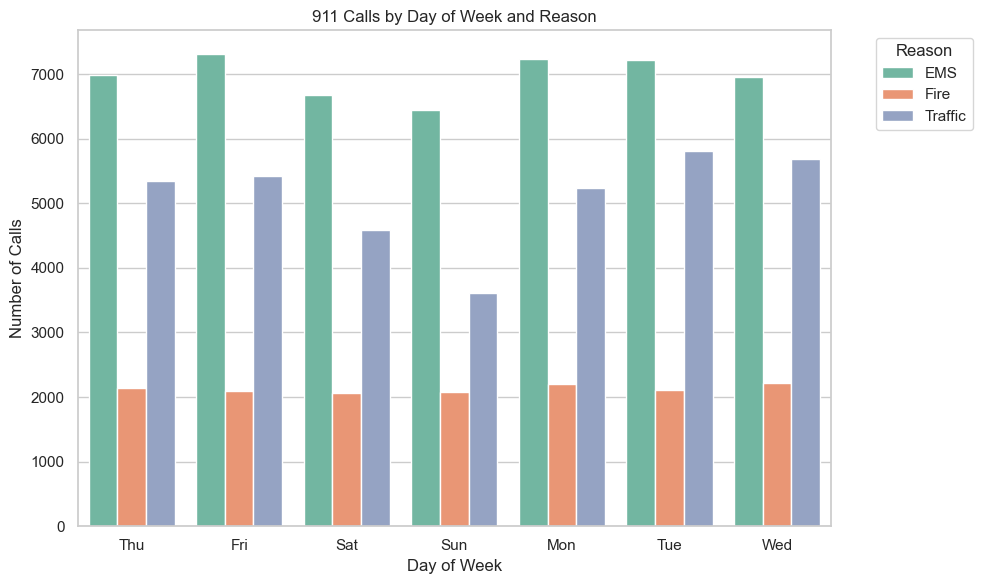

In [118]:
# Creating Reason column
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

# Creating countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day of Week', hue='Reason', palette='Set2')

# Adding labels and title
plt.title('911 Calls by Day of Week and Reason')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')

# Showing plot
plt.tight_layout()
plt.show()

**Now do the same for Month:**

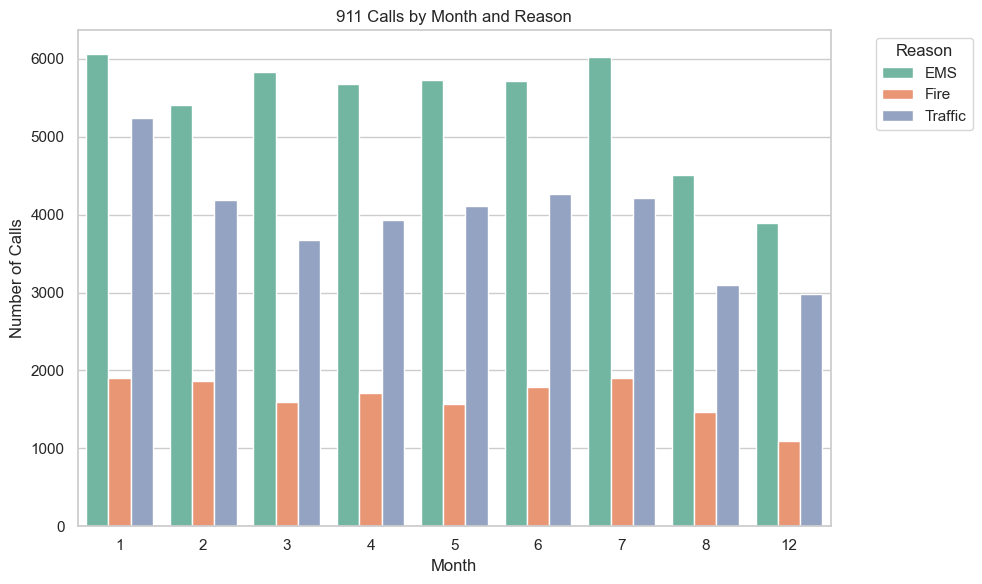

In [119]:
# Extracting Month and Reason
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

# Setting plot style
sns.set(style="whitegrid")

# Creating countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Reason', palette='Set2')

# Adding labels and title
plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')

# Showing plot
plt.tight_layout()
plt.show()

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [120]:
# Group by 'Month' and aggregate with count()
byMonth = df.groupby('Month').count()

# Show the first few rows
print(byMonth.head())

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13203  13203  13203  11526  13203      13203  13203  13094  13203   
2      11465  11465  11465   9930  11465      11465  11465  11395  11465   
3      11092  11092  11092   9754  11092      11092  11092  11052  11092   
4      11323  11323  11323   9895  11323      11323  11323  11280  11323   
5      11420  11420  11420   9943  11420      11420  11420  11375  11420   

       Reason   Hour  Day of Week  
Month                              
1       13203  13203        13203  
2       11465  11465        11465  
3       11092  11092        11092  
4       11323  11323        11323  
5       11420  11420        11420  


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

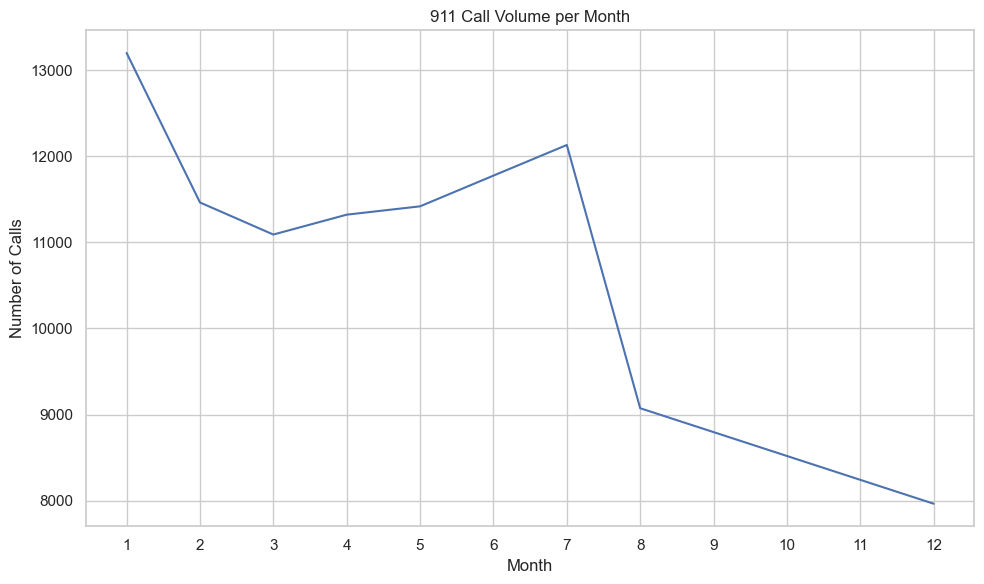

In [121]:
# Plotting the number of calls per month using the 'title' column
plt.figure(figsize=(10, 6))
byMonth['title'].plot()

# Adding titles and labels
plt.title('911 Call Volume per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(range(1, 13))  # Ensure months 1-12 are shown on x-axis

# Showing plot
plt.tight_layout()
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

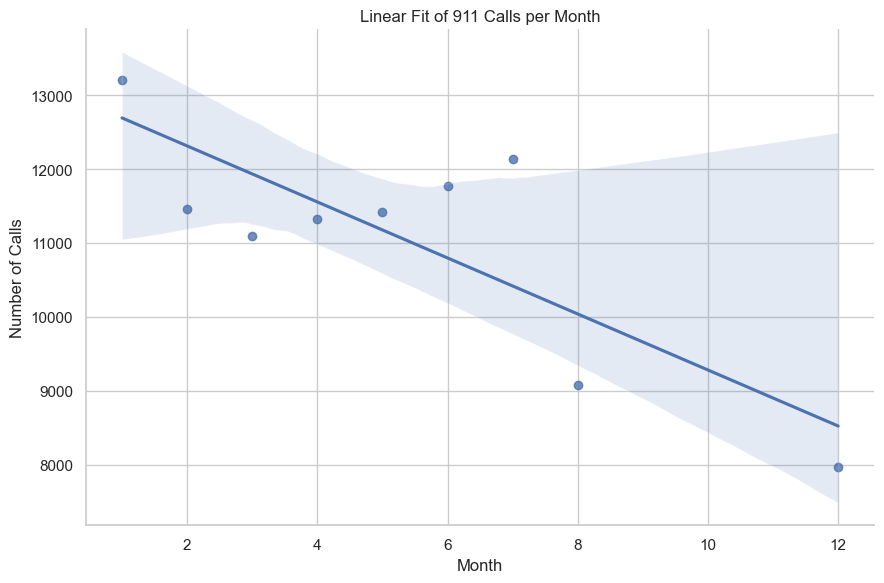

In [122]:
# Grouping and counting calls per month
byMonth = df.groupby('Month').count().reset_index()

# Creating a linear model plot using the 'title' column to count calls
sns.lmplot(data=byMonth, x='Month', y='title', height=6, aspect=1.5)

# Labeling the plot
plt.title('Linear Fit of 911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')

# Showing plot
plt.tight_layout()
plt.show()


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [123]:
# Create 'Date' column by extracting just the date part
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

# Preview the result
print(df[['timeStamp', 'Date']].head())

            timeStamp        Date
0 2015-12-10 17:40:00  2015-12-10
1 2015-12-10 17:40:00  2015-12-10
2 2015-12-10 17:40:00  2015-12-10
3 2015-12-10 17:40:01  2015-12-10
4 2015-12-10 17:40:01  2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

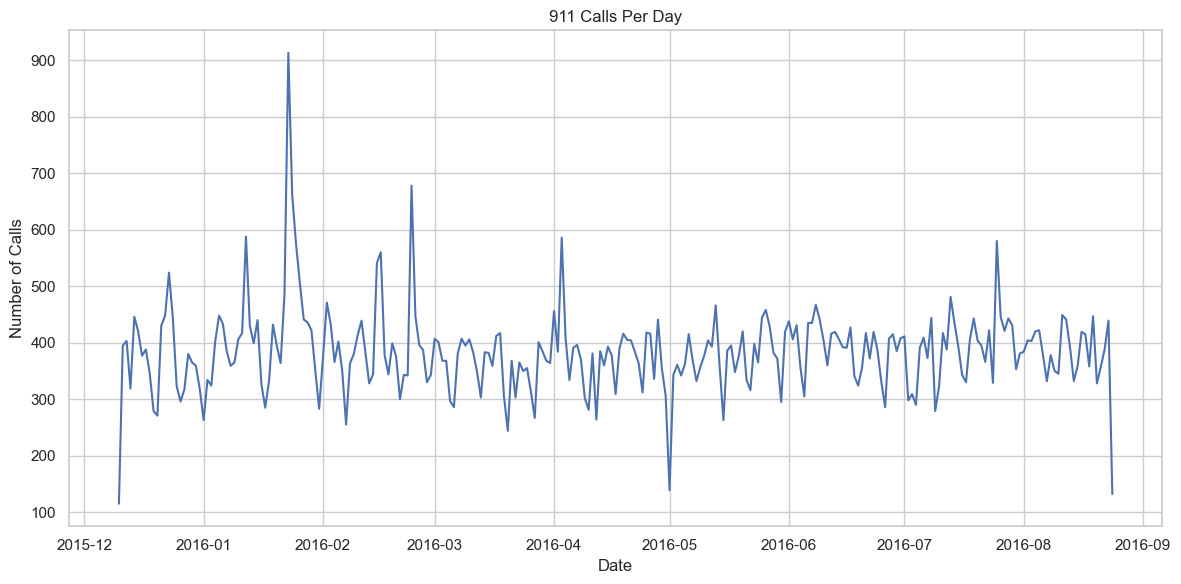

In [124]:
# Grouping by 'Date' and count calls (using 'title' as proxy)
byDate = df.groupby('Date').count()

# Plotting the number of calls per day
plt.figure(figsize=(12, 6))
byDate['title'].plot()

# Adding labels and title
plt.title('911 Calls Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

# Showing plot
plt.tight_layout()
plt.show()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [125]:
# Set up plot area
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

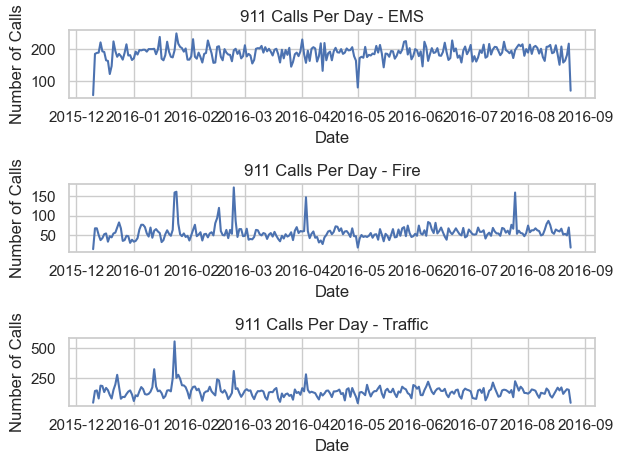

In [126]:
# Define the reasons
reasons = ['EMS', 'Fire', 'Traffic']

# Loop through reasons and plot
for i, reason in enumerate(reasons, 1):
    # Filter by reason
    reason_df = df[df['Reason'] == reason]
    # Group by date
    byDate = reason_df.groupby('Date').count()
    
    # Create subplot
    plt.subplot(3, 1, i)
    byDate['title'].plot()
    plt.title(f'911 Calls Per Day - {reason}')
    plt.xlabel('Date')
    plt.ylabel('Number of Calls')

# Adjust layout
plt.tight_layout()
plt.show()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

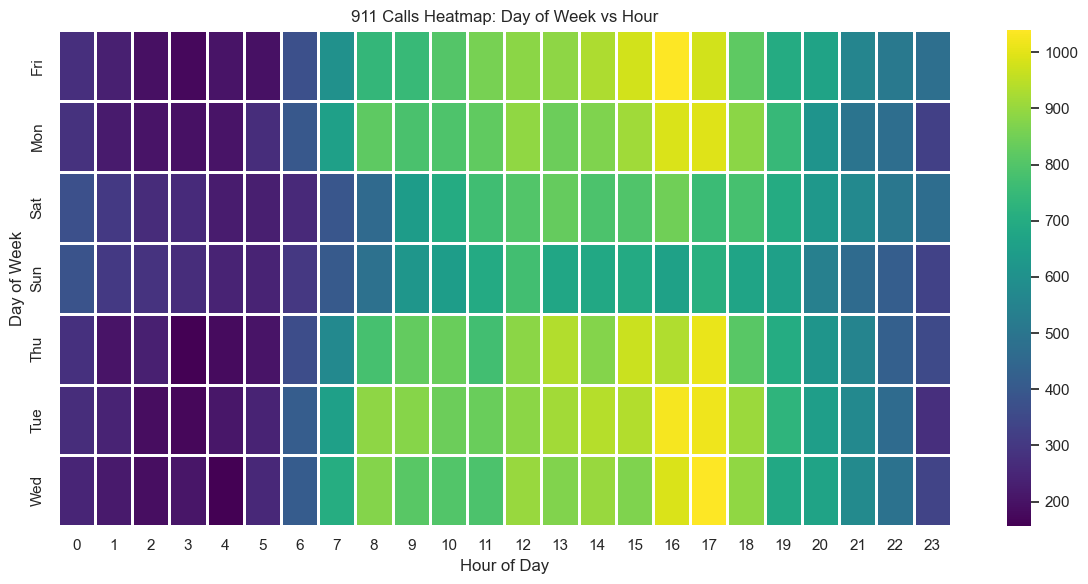

In [127]:
# Grouping by Day of Week and Hour, then count
heatmap_data = df.groupby(['Day of Week', 'Hour']).count()['title'].unstack()

# Setting up the plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', linecolor='white', linewidths=1)

# Adding labels and title
plt.title('911 Calls Heatmap: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Showing the plot
plt.tight_layout()
plt.show()

**Now create a HeatMap using this new DataFrame.**

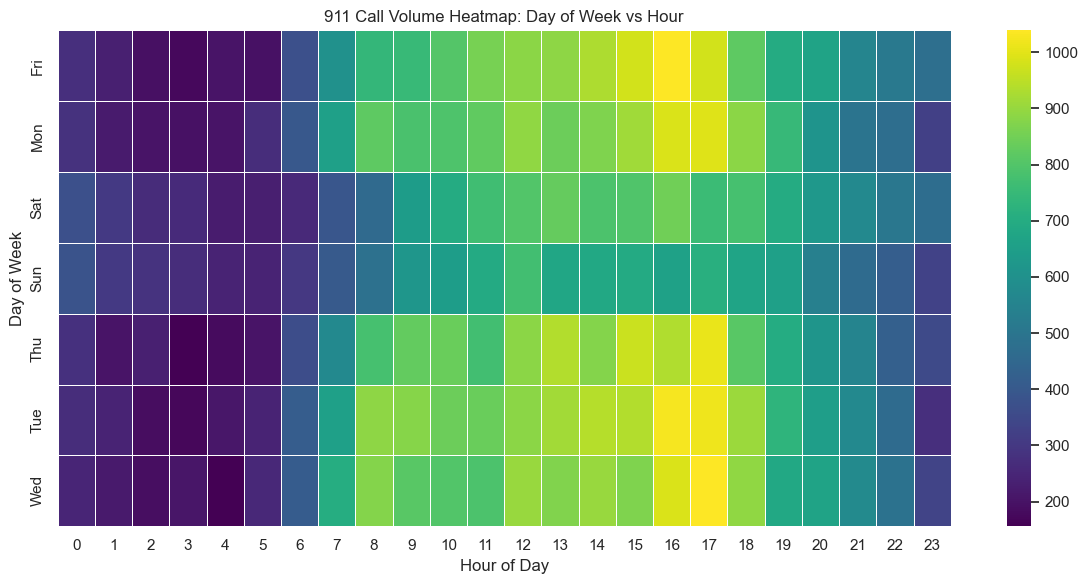

In [128]:
# Group by Day of Week and Hour, then count calls
day_hour = df.groupby(['Day of Week', 'Hour']).count()['title'].unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour, cmap='viridis', linewidths=0.5)

# Adding titles and labels
plt.title('911 Call Volume Heatmap: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Displaying the plot
plt.tight_layout()
plt.show()


**Now create a clustermap using this DataFrame.**

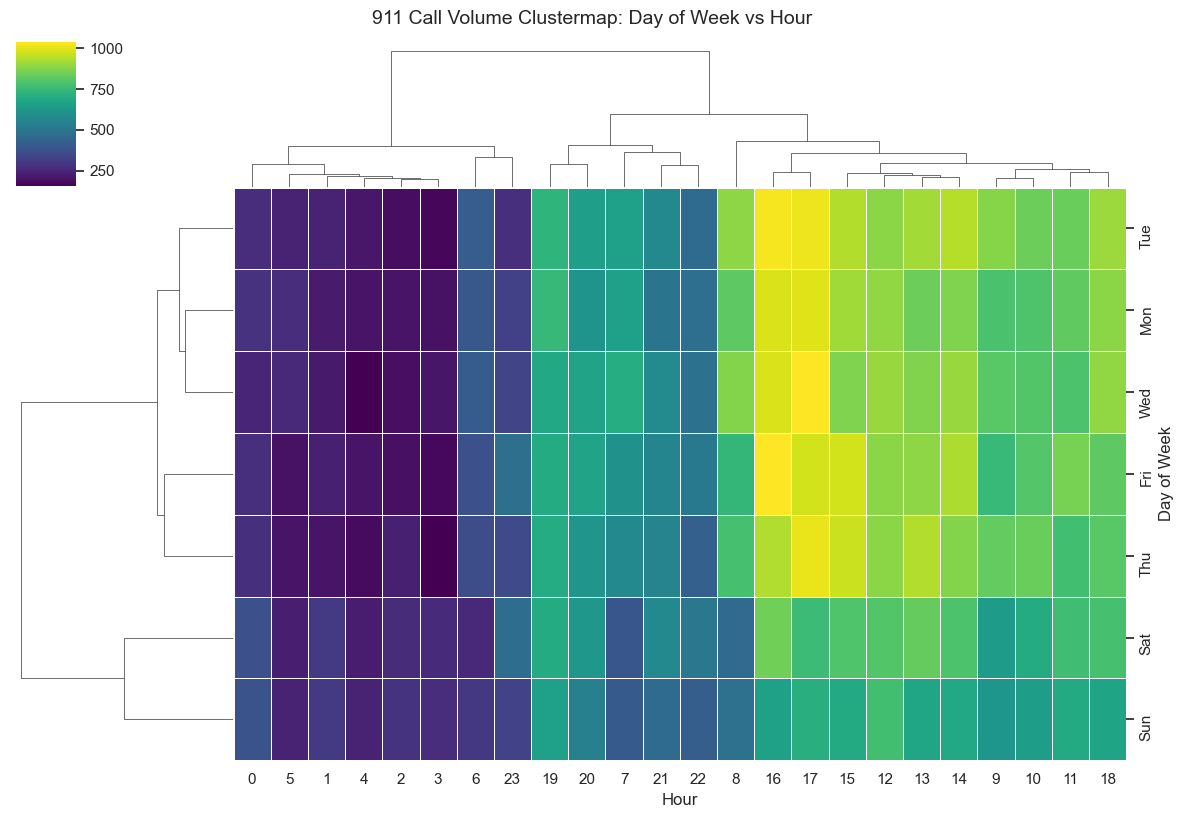

In [129]:
# Creatting clustermap from the Day of Week vs Hour DataFrame
sns.clustermap(day_hour, cmap='viridis', linewidths=0.5, figsize=(12, 8))

# Adding a title
plt.suptitle('911 Call Volume Clustermap: Day of Week vs Hour', fontsize=14, y=1.02)

# Showing the plot
plt.show()

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [130]:
# Grouping by Day of Week and Month
day_month = df.groupby(['Day of Week', 'Month']).count()['title'].unstack()

# Preview
print(day_month.head())

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Fri          1970  1581  1523  1958  1730  1649  2045  1310  1064
Mon          1727  1964  1533  1597  1779  1617  1692  1509  1256
Sat          2290  1440  1264  1732  1444  1388  1695  1099   978
Sun          1960  1229  1100  1488  1422  1331  1672  1021   907
Thu          1584  1596  1900  1601  1590  2065  1646  1227  1265


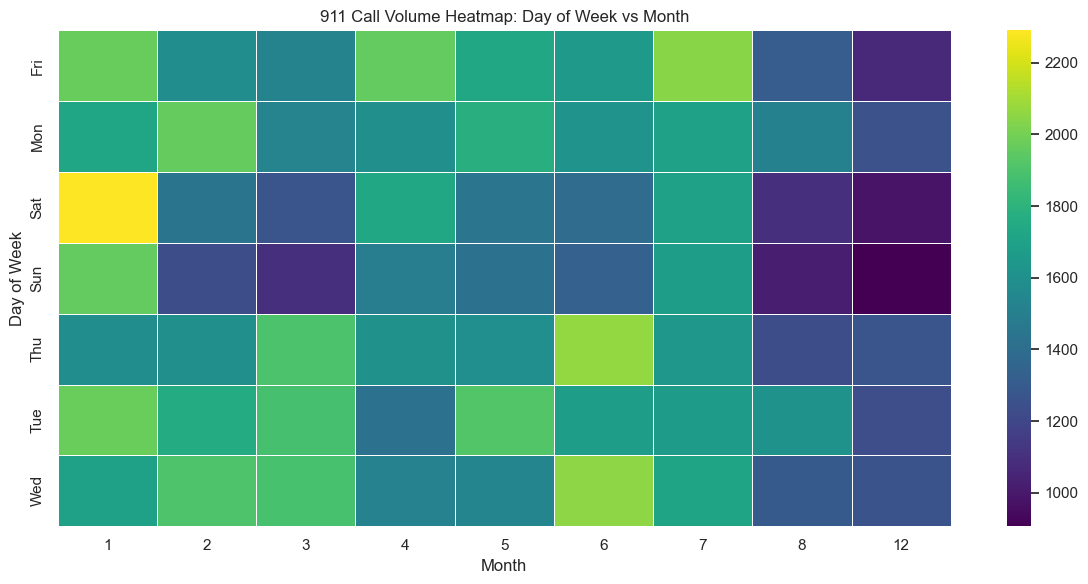

In [131]:
# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(day_month, cmap='viridis', linewidths=0.5)

plt.title('911 Call Volume Heatmap: Day of Week vs Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

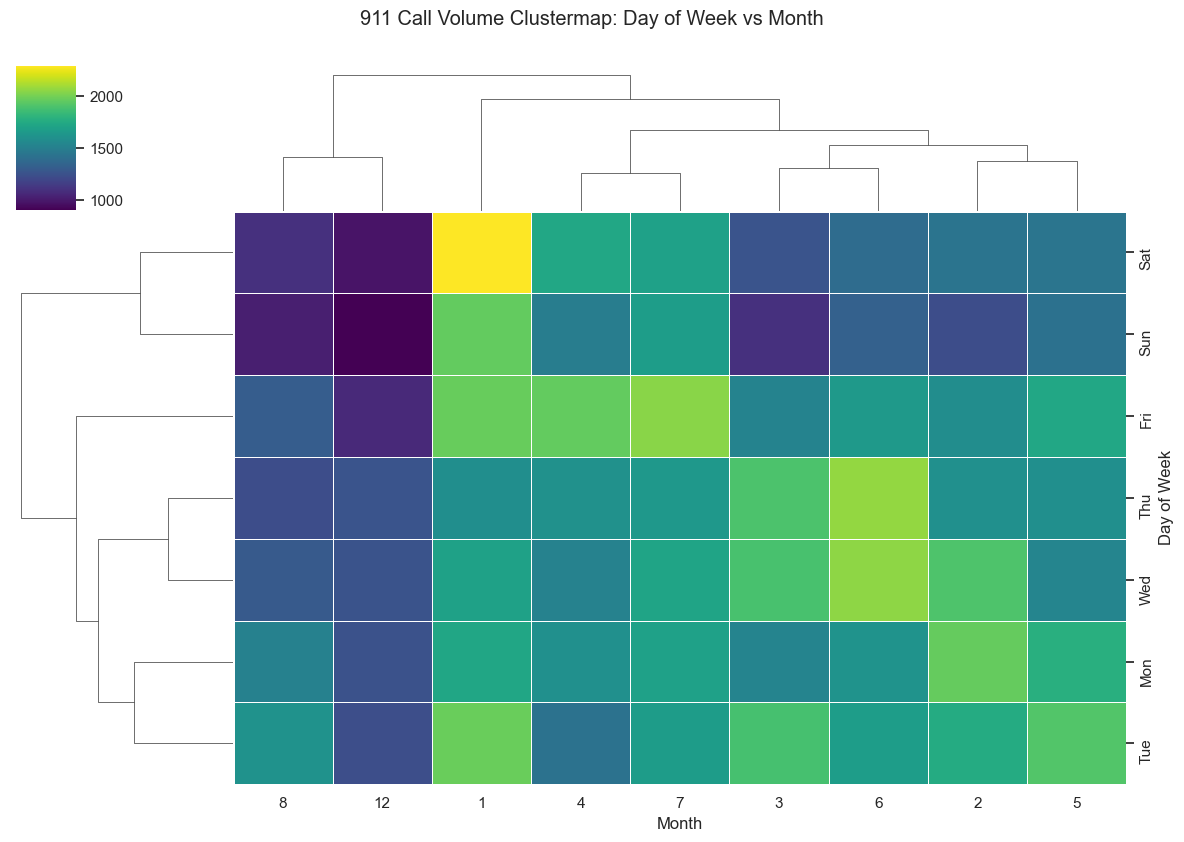

In [132]:
# Plotting clustermap
sns.clustermap(day_month, cmap='viridis', linewidths=0.5, figsize=(12, 8))

# Adding title
plt.suptitle('911 Call Volume Clustermap: Day of Week vs Month', y=1.05)
plt.show()

**Continue exploring the Data however you see fit!**
# Great Job!